# Deep Learning @ UWr 2021

**Lecture 04**

In lecture 3 we have looked at how to properly train deep neural networks. In this lecture we will look at how to train them without overfitting.

Please recall, that our primary goal is to **do well on unseen data**. This implies two things:
1. We must be able to do well on any data, that is we must be able to fit the network to the training data (which was essentially the topic of lecture 3).
2. We must be able to uncover the relations in the data that will stay true on the test set, rather than simply memorize the training data (which is fully doable for neural networks with many hidden neurons).

## Machine learning recap: underfitting, overfitting, model bias and variance

We fit the model using a finine data set that we have, hoping to find a model which will work on the new data that the model will be exposed to during its lifetime. 

Our primary concern is thus control and estimation of the error of the new data, or in other words generalization. First let's precise how can we estimate generalization error rate? When the dataset is large, we can simply keep some portion of the data we have for the final model validation. This is typically called a test set. In an indeal world, the test set is used only once - to get the performance of the final model. All other decision, such as choosing the final model must also be based on data, which often mandates using a development (or validation) set. Finally, the rest of te data is used to train the networks, that is to fit the weights and biases.

You may recall from the machine learnign course the cross-validation and bootstrap estimators, which could be used on small data. They can be used as well for deep learning, however it often happens that the datasets are so large, that we can afford to use a simple split of the data at hand into training, validation and testing sets and we will asusme this setup. On a small dataset, it can be rplaced e.g. by a nested cross-validation.

In a more elaborate setup, accessing true in-domain data is expensive, but there can be some extra data that can be used for training. Thus we hope to generalize from the abundant (e.g. partially generated or augmented) training dataset to the scarce test set. In this scenarion it is often recommended to maintain 4 subsets of the data:
- a train set: containing all relevant data that we can obtain. 
- a train-dev set, containing a small fraction of data like in the train set
- a dev set (or validation set), containing new data from the desired problem domain
- a test set, containg other data from the desired prblem domain

The train set is used to fit the model parameters (weights and biases) during a single training run. All other subsets are used to verify the model performance and provide giudance about possible improvements. In particular these 4 datasets lead to 4 error estimates: the training error, train-dev error, validation error, and testing error. A fifth error rate is the human error rate. Together, these 5 errors form an important diagnostic which tells us what should be improved in the model.

The difference between human and training errors can demonstrate underfitting, when the model performs worse on the data on which it is directly trained that a human would. Sometimes, we attribute underfitting to a bias of th model (it is not able to express the relation in the data).

The difference between the train and train-dev errors tells us about overfitting in our training procedure. In classical machine learning this could be called the variance. Regularization techniques, described below, aim at reducing this gap.

The difference between the train-dev and dev sets informs us on the domain mismatch: in order to increase the size of the train set, the training data distribution is different than the test distribution.

Finally, the difference between the dev and test sets tells us about the amount of overfitting to the dev set - each time we use it for model selection, we transmit a little bit of information in it into our model. If a dev set is over-used, we can fit to it just like we fit to a training set.

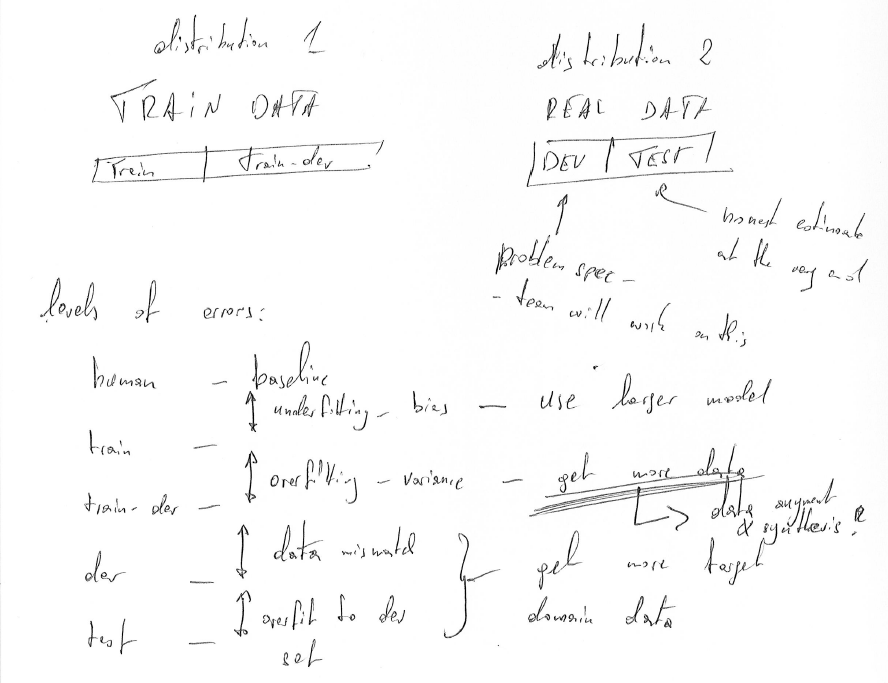

The analysis of the 5 errors must primarily inform us on whether we are:
1. underfitting, that is our model performs badly on both training and testing sets, it is also inferior to humans (and perhaps other models).
2. overfitting, when our model does well on training data, but does poorly on tests. 

The solutions to underfitting usually require us to use more powerful models (or to debug our training process, going back to lecture 3). The solutions to overfitting require constraining the model, or getting more or higher quality data. Being able to tell whether the model under- or over-fits is of crutial importance, because it directs our actions.

### Combatting underfitting (lowering model's bias)

When we can't fully fit the training set, we usually try the following:
1. increasing the model (increasing the width of layers almost always helps, increasing the depth must be paired with debugging the training process). 
2. debugging the training process (maybe the model is powerful enough, but we are unable to train it)?
3. getting better (more featureful) data, in which th desired relationship is easier to discover
4. invseting time in better models.


In Deep Learning, the easiest approach is usually to simply keep increasing the model until it fits the training data. Alternativaly, it often helps to use models known for good memorization performance (e.g. currently a transformer-based model).

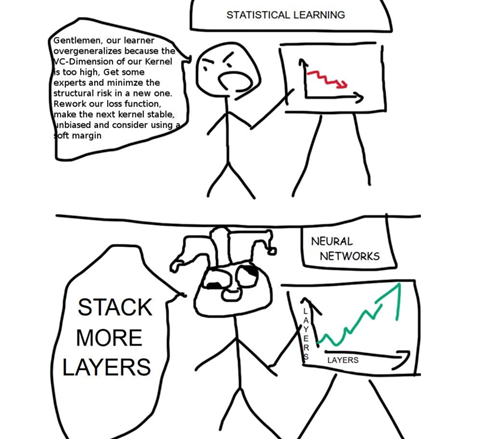

### Combatting data mismatches and dev set overfitting

These errors must be usually resolved by getting more in-domain data, or by making the training data generation/augmentation closer to the final data domain.

### Combatting overfitting to the training set: regularization

If the model performs poorly on testing data (or on dev-test, when there is no domain-mismatch), but appears to fit the training set, we must find ways to prevent the model from memorizing the training data without discovering patterns in it.

It nearly always helps to get more data, however this may be expensive.

When getting more data is not an option, regularization techniques can help. While some techniques widely used in classical machine learning are used, such as forcing small waights, some regularization techniques are specific to deep learning.

The most important distinction is that in classical machine learning, the optimization problems which define models are usually convex and training stops upon reaching their optimal points. In contrast, Deep Learning models are usually optimised only until they start to overfit (the analog in classical machine learning would be pruning of decision trees, which can be implemented as stopping tree growth even though some splits are possible). Due to this early stopping of training, the regularization may have a subtler effect on how they affect training dynamics. 

## Deep Learning Regularizations

### Early Stopping

Early Stopping was introduced in Lecture Notes 3, however it fundamentally is a regularization technique. After initialization, the model behaves randomly. Then it starts discovering patterns in the data, usually starting with the "low hanging fruits", i.e. the patterns that are easiset to spot. Gradually it adds more patterns that trigger a behavior on the training set, some of which will not generalize. We monitor the development error rate and abort training when the model starts to overfit. Thus we implicitely constrain the model to not act on patterns which are hard to be discovered by training with a first-order gradient based method (SGD).

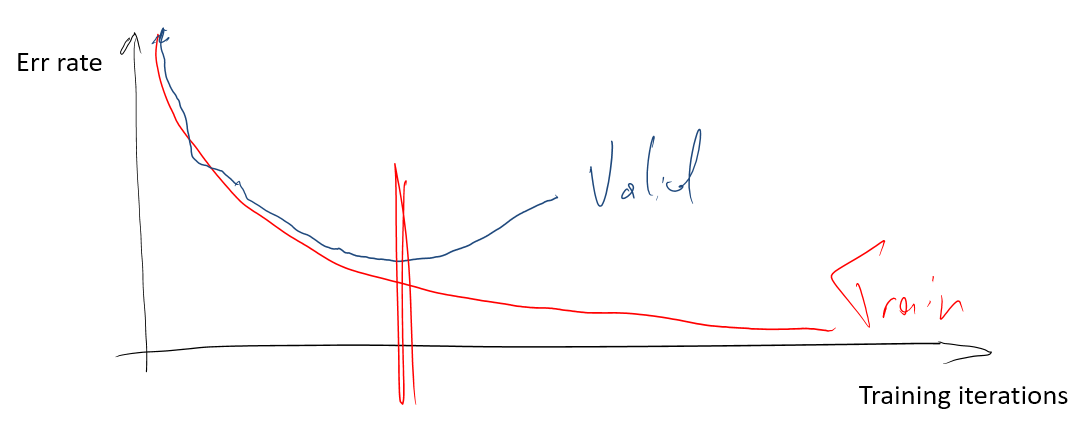

In deep learning early stopping may be one of the main factors behind the "deep double descent" phenomenon: large, overparameterized (i.e. having more tunable parameters than needed to fully fit the training data) do not overfit, and often reach better results than their smaller counterparts. 

The plots below, taken from [OpenAI blog note](https://openai.com/blog/deep-double-descent/) demonstrate the phenonmenon.

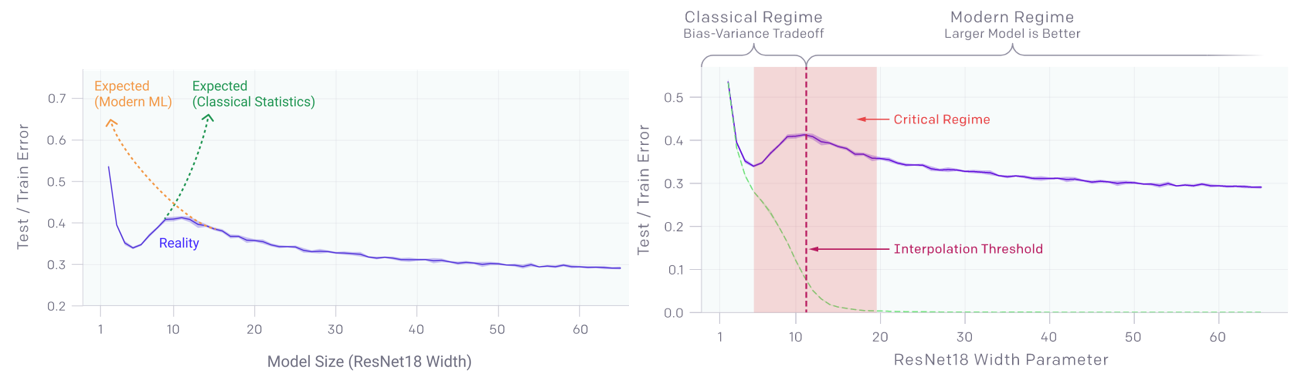

### L2 regularization in Classical Machine Learning

We can picture regularization as a way of specifying our preferences about models which with the training data equally well. For instance, we may say that we preffer small/simple motels over complicated ones.

this reasonong can be formalised using Bayesian inference. Suppose the models are indexed by $\theta$ (their parameters). We want to know which models are good after seeing the data $\mathcal{D}$, that is to know

$$
p(\theta | \mathcal{D}) 
$$

From the Bayes theorem we have that:

$$
p(\theta | \mathcal{D}) = \frac{p(\mathcal{D}|\theta)p(\theta)}{p(\mathcal{D})},
$$
where:
- $p(\mathcal{D}|\theta)$ is the _likelihood_ term, which captures the fit of the model to trainng data
- $p(\theta)$ is the _prior_ term, which tells which model we preffer before seeing any data
- $p(\mathcal{D})$ serves as a normalization constant, to ensure that we obtain a proper probability distribution.

Thus a model is probable if it jointly fits the data well and is consistent with our prior assumptions.

Since most of the time we want to have a single model which combines information in data and in our prior beliefs, we often simply maximise the numerator:
$$
\theta^*=\text{arg max}_\theta p(\mathcal{D}|\theta)p(\theta) = \text{arg max}_\theta \log p(\mathcal{D}|\theta) + \log p(\theta).
$$

This formally justifies adding regularization losses during training.


### L2 (weight decay) regularization

One particularly common prior put on model parameters is the assumption of their Gaussian distribution. This corresponds to extending the loss term with a sum of squares of parameters:

$$
L_2(\theta) = \lambda \sum_j \theta_j^2,
$$
where $\lambda$ is a constant which controls the strength of the regularization.

In a shallow (e.g. linear regression) model, L2 regularization states that all model coefficients should be small. This implies that no single data feature will have a large impact on the mode's output, because

$$
\frac{\partial \theta^T x}{\partial x} = \theta
$$

Thus, if $\theta$ has small entries, the effect of changing an input (approximated by the gradient) will be small as well. This is usually desired: it is plausible we preffer models for whose output changes slightly for two similar inputs.

This interpretation also closely follows why small weights are preferrable in deep neural networks: they limit the _gain_ of each layer, and lead to better stability. Moreover, with the tanh or sigmoidal activation, networks with small weights behave ina more linear fashion. This however is no longer true for ReLU networks.

### Interference of the L2 (weight decay) loss term and SGD modifications

It is custommary to implement weight decay by extending the loss function with a term $\lambda \sum_j \theta_j^2$. Then the gradient with respect to $\theta_j$ includes the term $2\lambda \theta_j$, which is subtracted from the parameter $\theta_j$ during each SGD step.

Thus, at each SGD step the weight "decays" a little bit (it becomes smaller), ant the regularization was called weight decay.

However, the picture is not so clear with SGD modifications, such as momentum or ADAM. Consider momentum, trainig:

$$
v_t = \gamma v_{t-1} + \alpha \frac{\partial \mathcal{L}}{\partial \theta^{(t)}} = \alpha \sum_{k=1}^{t} \gamma^{t-k}\frac{\partial \mathcal{L}}{\partial \theta^{(k)}},
$$
where $\frac{\partial \mathcal{L}}{\partial \theta^{(k)}}$ denotes the gradient during step $k$. 

If the gradients with respect to a parameter were constant, the momentum term would be equivalent to a learning rate increase by $\frac{1}{1-\gamma}$, the sum of th geomteric series. This is what momentum is designed for: boosting the influence of stabe gradients.

The weight decay term is not constant (it depends on the weight's magnitude), but is fairly stable, unless the weight is super small and changes sign often. Thus momentum will increase the strength of the regularization term!

To resolve this issue some authors (e.g. https://arxiv.org/abs/1711.05101 and the fast.ai course) propose to implement weight decay not as an extra term added to the loss function, but literaly as a decay of the weights applied after a gradient step. In PyTorch this behavior is obtained in e..g the [AdamW](https://pytorch.org/docs/stable/optim.html#torch.optim.AdamW) optimizer.

### Weight norm constraints: an alternative to weight decay

Another solution to enforce small weights in a way which does not influence with the optimizer is ot simply enforce a maximum norm on the weigth vector _incomning_ to each neuron.

This is easily achievable using _Projected Gradient Descent_: after each grdient application we loop over all neurons, compute the norm of incoming weights and optionally down scale them. This corresponds to projection of the parameters onto the feasible set.

### Weight noise

Weight decay and weight norm constraints force the model to have small weights. We have demonstrated that this promotes model stability with respect to changes ot the inputs, by limiting the _gain_ of each layer.

On the other hand, we may wish to have a model stable to small changes of its parameters. the intuition is that using a finite training set we cannot reliably set all weights with a high precision. As such, a reliable model should behave in the same way even if its parameters are slightly altered.

Training with additive weight noise strives to achieve exactly this behavior. On each traning minibatch we temporarily add a little noise to the weigth, then apply the forward and backward computations:

$$
\theta^{(t+1)} \gets \theta - \alpha \left.\frac{\partial \mathcal{L}}{\partial\theta}\right\rvert_{\theta = \theta^{(t)} + \text{ noise}}
$$

This can be interpreted as a MonteCarlo approximation to the expected gradient on networks sampled from a vicinity of th ecurrent parameters. This is exaclty what we want: set network parameters such that they work in the vicinity of the optimla point.

The weight noise technique is especially useful in regularizing recurrent neural networks, which we will study later on during the semester. Forcin small weights in an RNN often leads to signal (and gradient) decay, thus weight decay is often not an option.



### Dropout

Dropout is another important, and very often used technique to regularize deep networks.

It is motivated by the assumption, that overfitting i nneural networks happens becasue lage groups of neurons form clicques which commonly encode complex representations fo the data. Instead, we would preffer for each neuron in a layer to be interpertable and meaningful without conidering other ones. 

The proposed solution is surprisingly easy: on each minibatch randomly selected neurons are removed (dropped out) from the minibatch. The outputs of the remaining ones are scaled to compensate for the loss in signal magnitude. This can be impkemented by multiplication of neuron values by $0$ with probability $p$ if dropped out and $1/(1-p)$ if the neuron is used on that minibatch.

During test time, we can proceed in two ways:
1. we simulate several dropout patterns for each test example, then average the results (ideally we should take the expectation with respect to all neuron dropout possibilities)
2. we approximate the expected value with one forward pass using all neurons.

The second approach is usually sufficiently accurate, and being much faster, often used in practice.

however the first approach shows an important way to interpret dropout networks: a large ensemble of weights with different architectures (each dropoint mask induces a new network), but sharing weights. This interpretation brings a few interesting statistics to be computed:
1. the agreement between networks can be treated as a confidence score
2. we can train the networks to agree on their answers when diferent dropout masks are used. The second approach, called [pseudo-ensembles](https://papers.nips.cc/paper/2014/hash/66be31e4c40d676991f2405aaecc6934-Abstract.html) brings in an additional source of regularization.

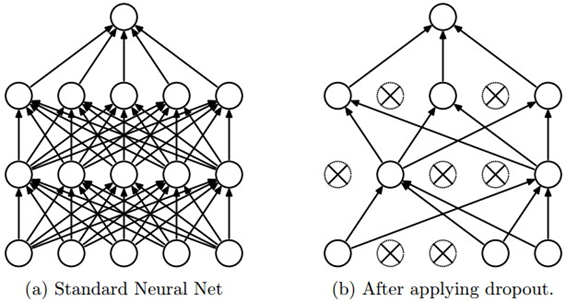

### Overconfidence in deep neural networks

Consider a neural network trained for classification with the SoftMax output layer.

Suppose we are given a data sample $x$. For each class $c$, the network predicts the a value, $s_c$. We typically assume these values are then converted into probabilities using the formula

$$
p(y=c | x) = \frac{e^{s_c(x)}}{\sum_{c'}e^{s_{c'}(x)}}
$$

Usually, the network is trained using the cross-entropy loss:

$$
\mathcal{L}^{(i)} = \sum_c -p(y^{(i)}=c)\log p(y=c | x^{(i)}),
$$
where we assume that each training samle $x^{(i)}$ is assigned a ground-truth probability distribution over classes. When the ground-truth contains a single class for each training sample, the loss simplifies to

$$
\mathcal{L}^{(i)} = -\log p(y=y^{(i)} | x^{(i)}).
$$

Assume that the network is highly accurate on the training data. Then the only way it has to lower the loss, is to return $p(y=y^{(i)} | x^{(i)})=1$ for each correctly classified training sample. The network achieves it, by returning large absolute values of the scores $s_c$.

This promotes nearly binary answers from the network, in which the probability of the "first guess" of the network is much higher than the probablity assigned to the second class.

This means, that while we can interpret the values returned by the network as probabilities, a sufficiently trained network will aways be very confuident in its predictions.

#### Label smoothing

The label smoothing technique, introduced for [InceptionV2](https://arxiv.org/abs/1512.00567) trains the network to predict a distribution over classes, rather than the single ground-truh class. We introduce a smoothing distribution by e.g. uniformily smoothing he probability over all classes:

$$
p(y^{(i)}=c) = \begin{cases}
\beta &\text{on the gorund-truth class}\\
\frac{1-\beta}{C-1} &\text{on all other classes}
\end{cases}
$$

Alternatively, we can spread the probability mass according to marginal class probabilities. This may be beneficial on problems with unbalanced classes.

Thus we train the model to return non-zero probability for all classes, while still training to predict the correct class. This prevents the model from becoming extremely confident in its predictions, while maintaining accurracy.

#### Label smoothing and other regularizers

Recall that weight decay limited the gain of the network, that is they limited the rate of change of network's output for a change in the input. Suppose w have to samples $x^{(a)}$ and $x^{(b)}$ belonging to different classes $y^{(a)}$ and $y^{(b)}$, respectively. Both $x^{(a)}$ and $x^{(b)}$ are correctly classified by the network. On any path in the $x$-space between the two samples the output of the network must switch from $y^{(a)}$ to $y^{(b)}$. It the network is very confident, the cnage may happen very abruptly. If the network is not so confident or has a small gain, then change must happen gradually.

#### Mixup regularization

The above reasoninig leads to the [Mixup regularization](https://arxiv.org/pdf/1710.09412.pdf) in which we force the output of the network to change gradually between two samples. Intuitively, we extend the dataset with fake samples constructed as linear combinations of $x^{(a)}$ and $x^{(b)}$:

$$\begin{split}
x' &= \lambda x^{(a)} + (1-\lambda)x^{(b)} \\
y' &= \lambda y^{(a)} + (1-\lambda)y^{(b)},
\end{split}$$
where we assume that $y^{(a)}$ and $y^{(b)}$ are probability distributions (which may be degenrate, that is putting all probability on one class only).

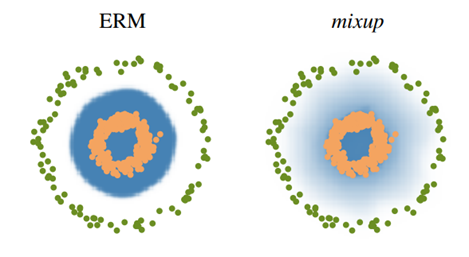

## Choosing hyperparameters

We have described several techniques for regulairzing neural netowrks. Several of them come with some hyperparameters, which can be set once for the whole network, or per layer (or even per-neuron). This makes hyperparameter selection particularly challenging in deep learning.

The issue is exacerbated by the fact, that often hyperperparameters should be changed together and that often a single parameter influences the network in more than one way. For instance, the learning rate affects both convergence speed and network generalizatoin. Likewise, as we have shown momentum can change the effective weight decay rate.

There are several approaches to hyperperameter selection. Simple strategies involve:
- grid searches, that is systematic searches over several variants of each parameters
- randomised searches,
- direct optimization over hyperparameters using e.g. gentic approaches
- modeling of the network error rates for hyperparameter combinations and optimizing over it. For instance https://github.com/JasperSnoek/spearmint uses Gausian Processses to model hyperparameter change impact.

Finally, many cloud providers started to offer hyperparameter tuning services, e.g. https://cloud.google.com/ai-platform/training/docs/using-hyperparameter-tuning

Out of the simple approaches, randomised search is more effective than grid searces, because it is more efficient whan some hyperparameters have little to no impact.

### Scaling laws and design rules

Currently, one of the best strategies in the search for hyperparameters is to browse related bublications for descriptions of similar models. For common problems, such as image recognition, some papers provide rules for scaling models, e.g. such rules are introduced in the [Efficient Nets architecture](https://arxiv.org/abs/1905.11946). Coupled with empirical [scaling laws](https://arxiv.org/abs/2001.08361) which relate dataset size, model size and training budget, these standardized recipes may offer many hints on initial hyperparameter selection for new problems.



## Conclusions

Deep Neural networks are remarkable because the often have low bias (they are universal approximators!) and can be efficiently regularized. Several deep-learning specific regularization strategies exist, however each technique comes with some design choices to be made.

Thus the application of deep learning requires not only models, but also considerable expertise required to select model hyperparameters. This task is made easier with automatic hyperparametr tuners and design rules.